In [2]:
import os
import pyam
import matplotlib.pyplot as plt
# Import the library to efficiently search variables
import triesearching

Helpers : 
This text is to help a future user to plot timeseries data in the IAMC format.
First of all, make sure you have done the translation of the Wiliam's variable before using this file. 
If not, go to the ReadMe to know how to do it. 

The first three cells should be executed to load the file with the data and get all the required variable in the file. 

If you want to have the list of all scenario, model, region, variables, the execution in a python cell of df.category_wanted gives you a list all the available elements in the Region, Variable, Model and Scenario category. If you want a globally known the name of your variable the completion helpers can be useful. Put the beginning of your variable's name and it gives you all the variable corresponding to this prefix.

# Timseseries Plot

In [3]:
cwd = os.getcwd()

# Complete the path to the results file (in IAMC format)
path = "..\\Conversion-Script\\File_Converted\\"

try:
    df = pyam.IamDataFrame(path + "Baseline no policies no CO2taxconverted.csv")
except:
    print("ERROR opening the file with results in IAMC format")

[INFO] 10:50:57 - pyam.core: Reading file ..\Conversion-Script\File_Converted\Baseline no policies no CO2taxconverted.csv
C:\Users\AdGeeds\AppData\Roaming\Python\Python310\site-packages\pyam\utils.py:316: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.set_index(index + REQUIRED_COLS + extra_cols)


### Completions Helpers

In [4]:
# Creation of the trie (tree data structure) of our results
trie = triesearching.Trie()

for x in df.variable:
    trie.insert(x)

In [5]:
# Enter the prefix of the variable you want to see.

prefix = input("Enter a prefix to search for completions: ")
completions = triesearching.suggest_completions(trie, prefix)
print("Completions:", "\n".join(completions))


Completions: Final Energy|Accommodation|Electricity
Final Energy|Accommodation|Gas
Final Energy|Accommodation|Heat
Final Energy|Accommodation|Hydrogen
Final Energy|Accommodation|Liquid
Final Energy|Accommodation|Solid|Biomass
Final Energy|Accommodation|Solid|Fossil
Final Energy|Animals|Electricity
Final Energy|Animals|Gas
Final Energy|Animals|Heat
Final Energy|Animals|Hydrogen
Final Energy|Animals|Liquid
Final Energy|Animals|Solid|Biomass
Final Energy|Animals|Solid|Fossil
Final Energy|Construction|Electricity
Final Energy|Construction|Gas
Final Energy|Construction|Heat
Final Energy|Construction|Hydrogen
Final Energy|Construction|Liquid
Final Energy|Construction|Solid|Biomass
Final Energy|Construction|Solid|Fossil
Final Energy|Crops|Electricity
Final Energy|Crops|Gas
Final Energy|Crops|Heat
Final Energy|Crops|Hydrogen
Final Energy|Crops|Liquid
Final Energy|Crops|Solid|Biomass
Final Energy|Crops|Solid|Fossil
Final Energy|Education|Electricity
Final Energy|Education|Gas
Final Energy|Educa

# Plot differentiate by variable for a same region 


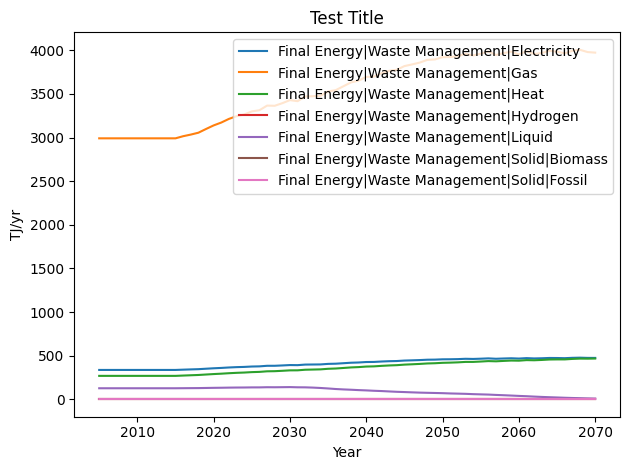

In [6]:

model, scenario = "WILIAM", "Baseline no policies no CO2tax"
variable = 'Final Energy|Waste Management|*'
title = 'Test Title' # To complete manually
region_of_interest = 'Austria' # To complete manually you can put all the existing region that are present in the country_dict file in the path IAMC_format\Conversion-Script\Create_Variable_Dict. 

data = df.filter(model=model, scenario=scenario, variable=variable, region= region_of_interest)

data.plot(color="variable", title= title)
data.timeseries()
plt.legend(loc=1)
plt.tight_layout()
plt.savefig('Final Energy')
plt.show()

# Plot of a same variable differentiate by region 

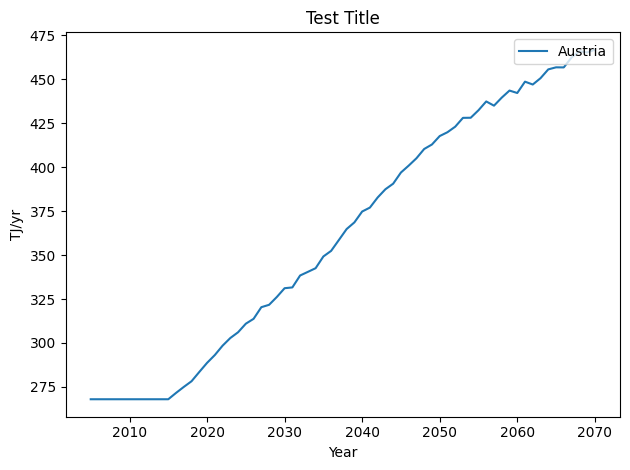

In [7]:
model, scenario = "WILIAM", "Baseline no policies no CO2tax"
variable = 'Final Energy|Waste Management|Heat' # To change the variable you want to plot you can use the tree searching above to find all the available variables.
title = 'Test Title' # To complete manually


# If you want to remove the region World, you need to add this at the end of the above line .filter(region="World", keep=False)
data = df.filter(model=model, scenario=scenario, variable=variable)

data.plot(color="region", title=title)
data.timeseries()
plt.legend(loc=1)
plt.tight_layout()
plt.savefig('Final Energy')
plt.show()

# Plot of a same variable with the same region differentiate by scenario 

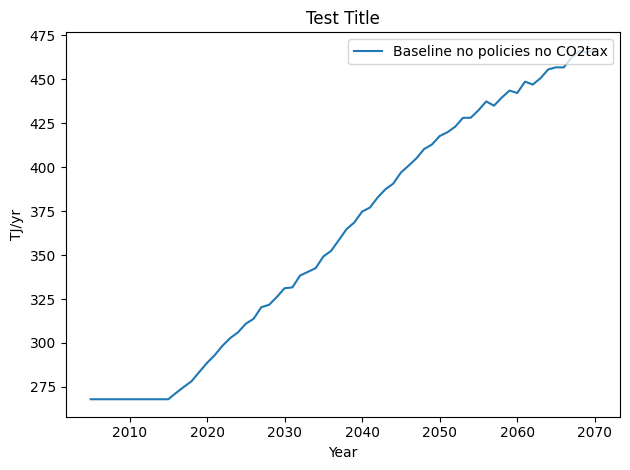

In [8]:
model  = "WILIAM" 
variable = 'Final Energy|Waste Management|Heat' # To change the variable you want to plot you can use the tree searching above to find all the available variables.
title = 'Test Title' # To complete manually
region = 'Austria' #To complete manually

# If you want to remove the region World, you need to add this at the end of the above line .filter(region="World", keep=False)
data = df.filter(model=model, variable=variable, region=region)

data.plot(color="scenario", title=title)
data.timeseries()
plt.legend(loc=1)
plt.tight_layout()
plt.savefig('Final Energy')
plt.show()